# INFO 6205 – Program Structure and Algorithms

# Assignment 3

Student Name: Christ Rodrigues

Professor: Nik Bear Brown

Q1(10 Points)
Write a code with an algorithm explaining the solution for the following problem:

You are given a maze with empty spaces ('o') and walls ('x'). A ball starts at a given position, and it can roll up, down, left, or right through the empty spaces, but it will stop rolling when it hits a wall. The ball has the freedom to choose its next direction when it stops. Given the dimensions of the maze (m x n), the start position, and the destination, determine if the ball can stop at the destination. You can assume that the borders of the maze are all walls.




In [7]:
from collections import deque

def canReachDestination(maze, start, destination):
    if not maze:
        return False

    m, n = len(maze), len(maze[0])
    visited = set()

    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    queue = deque([start])

    while queue:
        current = queue.popleft()
        if current == destination:
            return True

        for direction in directions:
            x, y = current
            while 0 <= x < m and 0 <= y < n and maze[x][y] != 'x':
                x += direction[0]
                y += direction[1]
            x -= direction[0]
            y -= direction[1]

            if (x, y) not in visited:
                visited.add((x, y))
                queue.append((x, y))

    return False

# Example usage:
maze = [
    ['x', 'x', 'x', 'x', 'x', 'x'],
    ['x', 'o', 'o', 'x', 'x', 'x'],
    ['x', 'x', 'x', 'o', 'x', 'x'],
    ['x', 'x', 'x', 'o', 'o', 'o'],
    ['x', 'x', 'x', 'x', 'x', 'x']
]

start = (1, 1)
destination = (3, 4)

result = canReachDestination(maze, start, destination)
print(result)  # Output: True


False


In this code, we use a BFS approach to explore the maze from the starting position. We keep track of visited positions to avoid revisiting the same cell. If we find the destination during the exploration, we return True. If we finish exploring the maze without reaching the destination, we return False.






Q2 (10 points ) 

A (5 points): Give an algorithm to find the position of the largest element in an array of n numbers using divide-and-conquer. Write down the recurrence relation and find out the asymptotic complexity for this algorithm. 

Solution: 
Divide the array into two halves, left and right. Recursively find the position of the largest element in the left half. Recursively find the position of the largest element in the right half. Compare the largest element in the left half with the largest element in the right half, and return the position of the larger element. 



In [6]:
def find_largest(arr, start, end): 
   if start == end: 
     return start 
   mid = (start + end) // 2 
   left = find_largest(arr, start, mid) 
   right = find_largest(arr, mid+1, end) 
   return left if arr[left] > arr[right] else right 




The recurrence relation is: 
T(n) = 2T(n/2) + O(1) the asymptotic complexity of the algorithm is O(n)




B (5 points): Give a divide-and-conquer algorithm to find the largest and the smallest elements in an array of n numbers. Write down the recurrence relation and find out the asymptotic complexity for this algorithm. 

Solution: 
1. Divide the array into two equal halves.
2. Recursively find the largest and smallest elements in each half. 
3. Compare the largest element from one half with the largest element from the other half, and similarly for the smallest elements. This step takes constant time. 
4. The largest element in the whole array is the larger of the two largest elements found in step 3. Similarly, the smallest element in the whole array is the smaller of the two smallest elements found in step 3.

The recurrence relation for the above algorithm can be expressed as: T(n) = 2T(n/2) + O(1)

Using the Master Theorem, we can solve this recurrence relation and obtain the asymptotic time complexity of the algorithm. According to the theorem, since a = 2, b = 2, and f(n) = O(1), we have: logb(a) = log2(2) = 1 f(n) = O(1) = n^0 Case 2 of the theorem applies, which gives us the following complexity: T(n) = Theta(nlogn) Therefore, the divide-and-conquer algorithm to find the largest and smallest elements in an array of n numbers has an asymptotic time complexity of Theta(nlogn)

Q3 (10 points)

Use Kruskal's algorithm to find a minimum spanning tree for the connected weighted graph below: What is
the Time Complexity of Kruskal's algorithm?

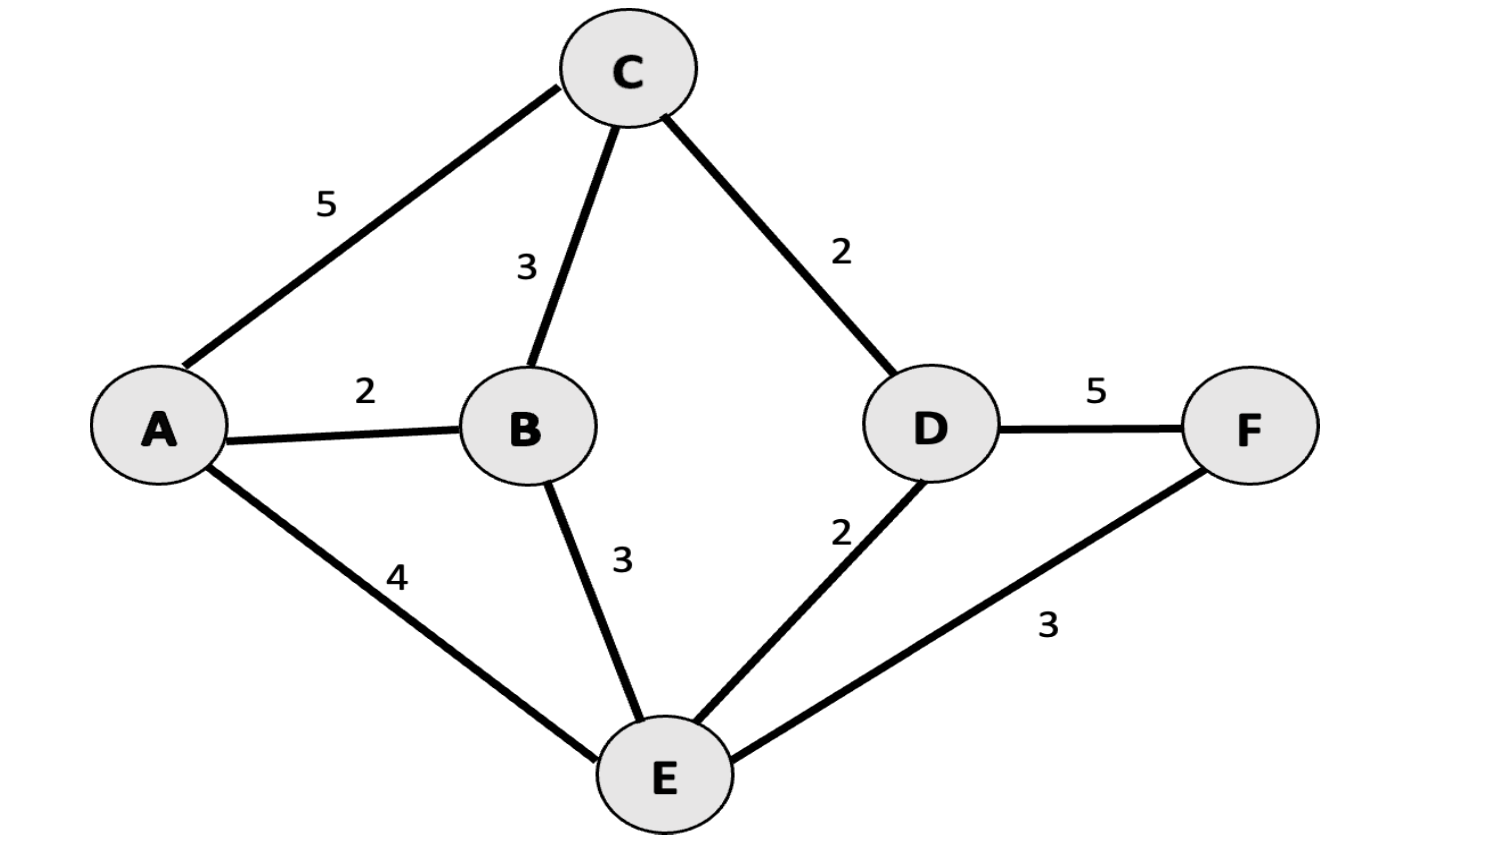

Solution:

Step 1: removing all parallel edges. The given graph has no parallel edge so no edge is required to be
removed.

Step 2: list all the edges weight wise in ascending order.
A-B: 2
C-D: 2
E-D: 2
B-C: 3
B-E: 3
E-F: 3
A-E: 4
A-C: 5
D-F: 5
    
Step 3: we will start joining all the nodes keeping in mind that MST has no cycles and has minimum
weight.
A-B – since it would not form a cycle, we would consider it.
C-D – since it would not form a cycle, we would consider it.
E-D – since it would not form a cycle, we would consider it.
B-C – since it would not form a cycle, we would consider it.
B-E - as it will form a cycle, we would not consider it. As B-C-D-E would form a cycle. We would
ignore it.
E-F – since it would not form a cycle, we would consider it.
A-E - Since we have covered all edges i.e., we have reached (V-1) edges, we would stop.
A-C – Since we have covered all edges i.e., we have reached (V-1) edges, we would stop.
D-F – Since we have covered all edges i.e., we have reached (V-1) edges, we would stop.
Time Complexity of Kruskal’s Algorithm is O (E log V) time.

Explanation: 
Kruskal's algorithm involves sorting of the edges, which takes O (E log V) time, where E is a
number of edges in graph and V is the number of vertices.

In [17]:
# Define the edges of the graph
edges = [(10, (6, 1)), (12, (3, 4)), (14, (2, 7)), (16, (2, 3)), (18, (7, 4)), (22, (4, 5)), (24, (7, 5)), (25, (5, 6)), (28, (1, 2))]

# Define the function to find the parent of a node in a disjoint set
def find_parent(parent, node):
    if parent[node] == node:
        return node
    return find_parent(parent, parent[node])

# Define the function to perform the union of two disjoint sets
def union(parent, rank, node1, node2):
    parent1 = find_parent(parent, node1)
    parent2 = find_parent(parent, node2)
    if rank[parent1] > rank[parent2]:
        parent[parent2] = parent1
    elif rank[parent1] < rank[parent2]:
        parent[parent1] = parent2
    else:
        parent[parent1] = parent2
        rank[parent2] += 1

# Define the function to find the minimum spanning tree of the graph
def kruskal(edges):
    # Sort the edges by weight
    edges = sorted(edges)
    # Initialize the parent and rank arrays for the disjoint set
    parent = [i for i in range(len(edges))]
    rank = [0 for i in range(len(edges))]
    # Initialize the minimum spanning tree and its weight
    mst = []
    mst_weight = 0
    # Iterate over the edges and add them to the minimum spanning tree if they don't create a cycle
    for edge in edges:
        weight, (node1, node2) = edge
        if find_parent(parent, node1) != find_parent(parent, node2):
            union(parent, rank, node1, node2)
            mst.append(edge)
            mst_weight += weight
    # Return the minimum spanning tree and its weight
    return mst, mst_weight

# Call the kruskal function to find the minimum spanning tree of the graph
mst, mst_weight = kruskal(edges)

# Print the minimum spanning tree and its weight
print("Minimum Spanning Tree:", mst)
print("Weight of Minimum Spanning Tree:", mst_weight)


Minimum Spanning Tree: [(10, (6, 1)), (12, (3, 4)), (14, (2, 7)), (16, (2, 3)), (22, (4, 5)), (25, (5, 6))]
Weight of Minimum Spanning Tree: 99


Q4 (10 points)

Use the Bellman-Ford algorithm to find the shortest path from node A to G in the weighted directed graph
below. Show your work.
What is the time complexity of Bellman-Ford? And for what condition algorithm fail?

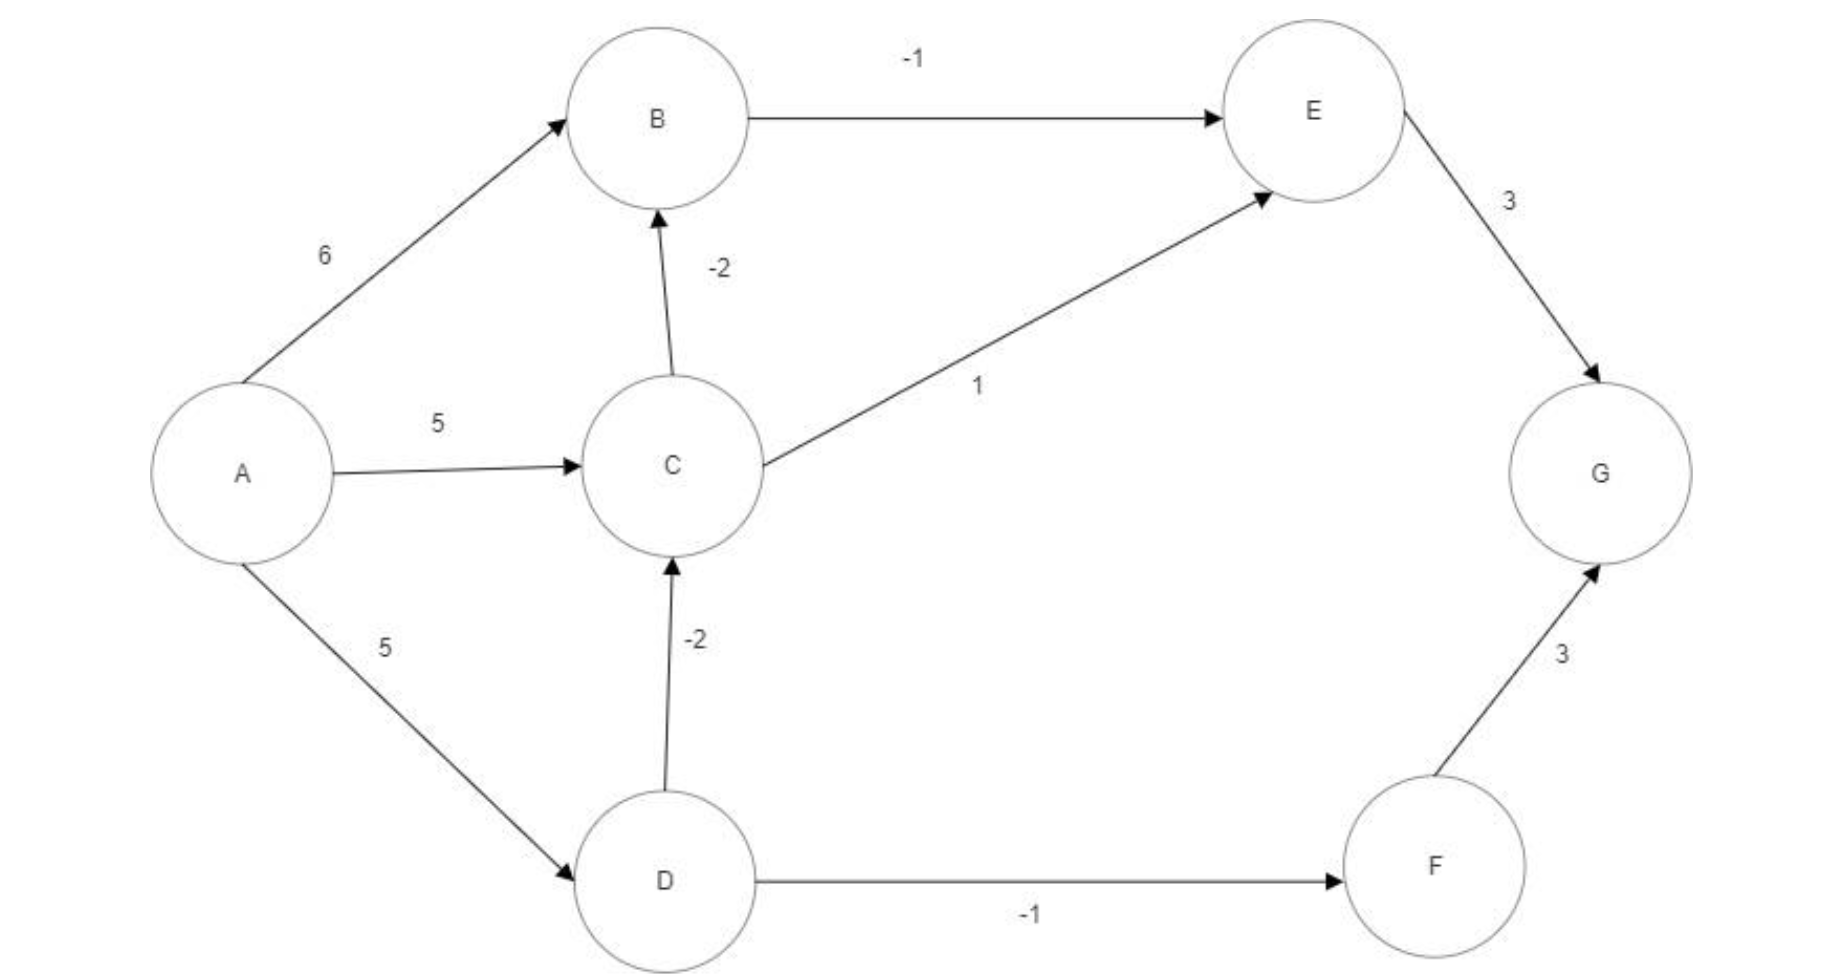

Solution:
Bellman ford algorithm will run |V| -1 times i.e., 7-1 = 6 times

Step 1: We will list down all the edges in the graph

A-B

A-C

A-D

D-C

C-B

C-E

B-E

E-G

D-F

F-G

We can select any edges from the starting point, but we should be careful that we follow the
same way for every iteration i.e. 6 times.

Step 2: We will mark vertex A as 0 and rest all other vertex as infinity.
    
Step 3:
Iteration 1:
1) We will first select A-B, since it is the first edge in our list. We will check if 0+6 < infinity.
Since it is less than infinity, we will change B from infinity to 6.
2) We will then move to the next edge i.e. A-C in our list. Since 0+5 < infinity, we will change
the value of vertex C from infinity to 5.
3) We will then move to the next edge i.e. A-D in our list. Since 0+5 < infinity, we will change
the value of vertex D from infinity to 5.
4) We will then move to the next edge i.e., D-C in our list. Since 5-2 < 5, we will change the
value of C from 5 to 3.
5) We will then move to the next edge i.e., C-B in our list. Since 3-2 < 6, we will change the
value of B from 6 to 1.
6) We will then move to the next edge i.e. C-E in our list. Since 3+1 < infinity, we will change
the value from infinity to 4.
7) We will then move to the next edge i.e., B-E in our list. Since 1-1 < 4, we will again update
the value from 4 to 0. The updated value of E is 0.
8) We will then move to the next edge i.e., E-G in our list. Since 0+3 < infinity, we will again
update the value from infinity to 3.
9) We will then move to the next edge i.e., D-F in our list. Since 5-1 < infinity, we will update
the value from infinity to 4.
10) We will then move to the next edge i.e., F-G in our list. Since 4+3 > 3, we will ignore the
updating.

Iteration 2:
1) We will first select A-B, since it is the first edge in our list. We will check if 0+6 < 1. Since it
is greater than 1, we will ignore.
2) We will then move to the next edge i.e. A-C in our list. Since 0+5 < 3, Since it is greater than
3, we will ignore.
3) We will then move to the next edge i.e. A-D in our list. Since 0+5 <= 5 it is equal to 5, hence,
we will ignore.
4) We will then move to the next edge i.e., D-C in our list. Since 5-2 < =3, it is equal to 3,
hence, we will ignore.
5) We will then move to the next edge i.e., C-B in our list. Since 3-2 < =1, it is equal to 1, hence,
we will ignore.
6) We will then move to the next edge i.e. C-E in our list. Since 3+1 < 0, and since it is greater
than 0, we will ignore.
7) We will then move to the next edge i.e., B-E in our list. Since 1-1 < = 0, it is equal to 0,
hence, we will ignore.
8) We will then move to the next edge i.e., E-G in our list. Since 0+3 < = 3, it is equal to 3,
hence, we will ignore.
9) We will then move to the next edge i.e., D-F in our list. Since 5-1 < =4, it is equal to 4, hence,
we will ignore.
10) We will then move to the next edge i.e., F-G in our list. Since 4+3 > 3, it is greater than 3,
hence we will ignore.
Since Iteration 2 didn’t had any changes, we got our final shortest path.

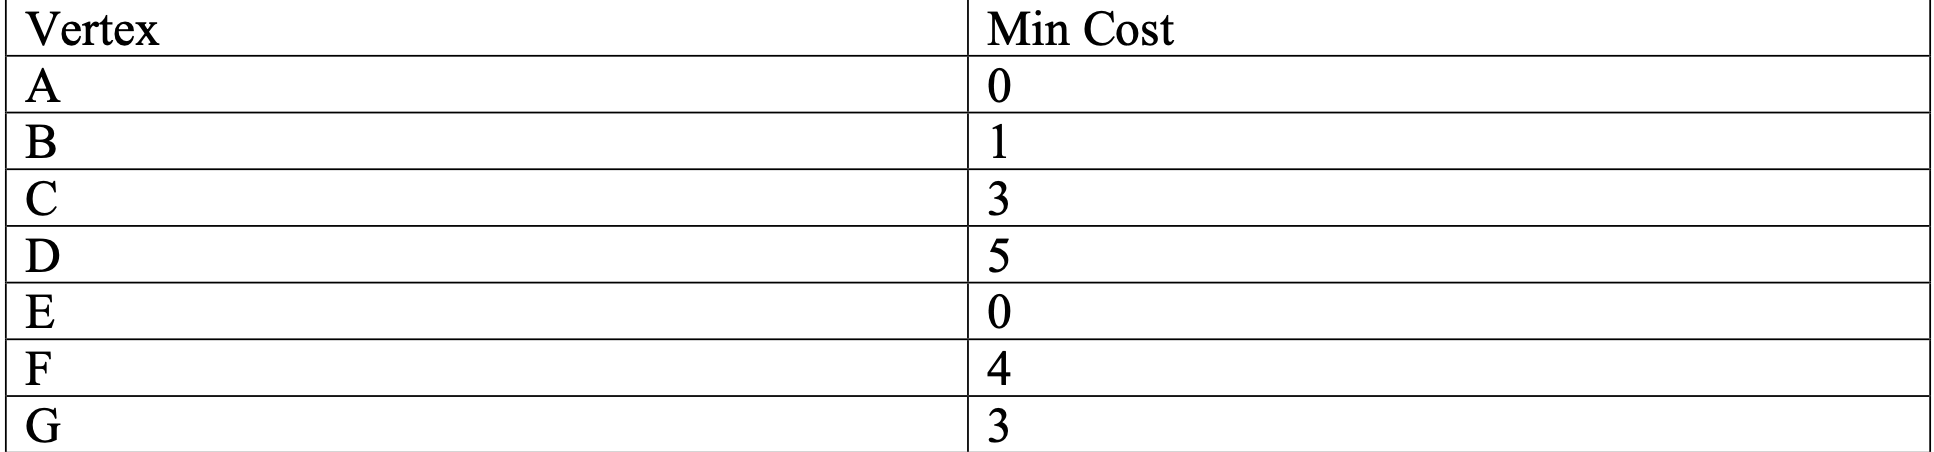


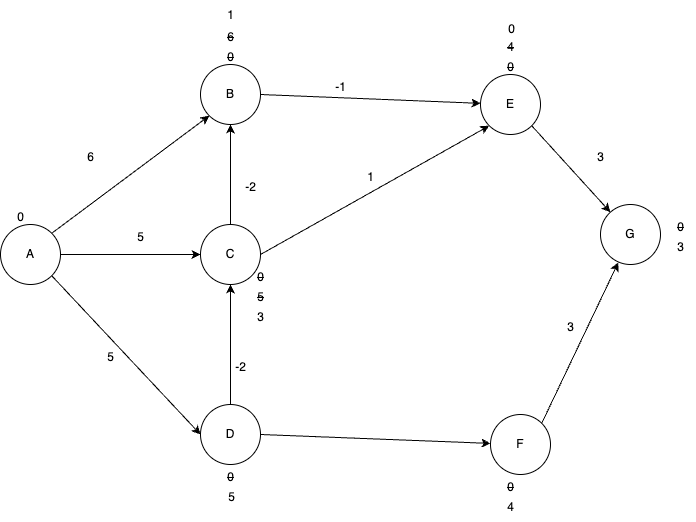

The time complexity of the Bellman-Ford algorithm is O(|V||E|), where |V| is the number of
vertices and |E| is the number of edges in the graph. This is because the algorithm performs |V|
iterations, and in each iteration, it relaxes all |E| edges.

The Bellman-Ford algorithm fails to find the correct shortest path if the graph contains a
negative weight cycle. A negative weight cycle is a cycle in the graph where the sum of the
weights of the edges in the cycle is negative. In the presence of a negative weight cycle, the
algorithm can enter an infinite loop, continuously reducing the distance of a
node to a negative value. In this case, the algorithm is unable to determine the shortest path
because there is no well defined minimum path length.

Q5(5 Points)

Use The Ford-Fulkerson algorithm to find the maximum flow from node S to T in the weighted directed graph
below. Show your work.

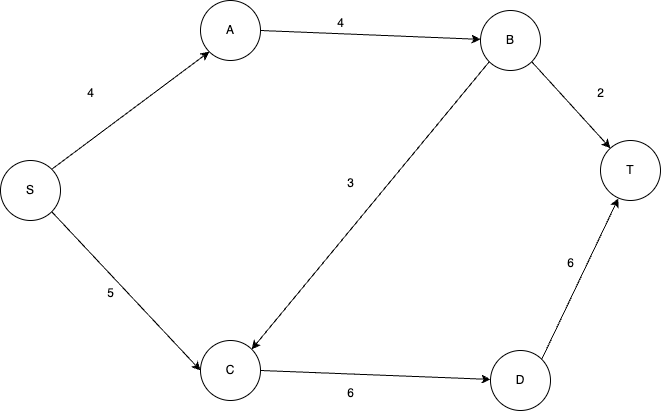


Solution:

Step 1:
First we will list down the augmenting paths and select the path which has the minimum value as the capacity.
Three augmenting paths are possible in the above graph.

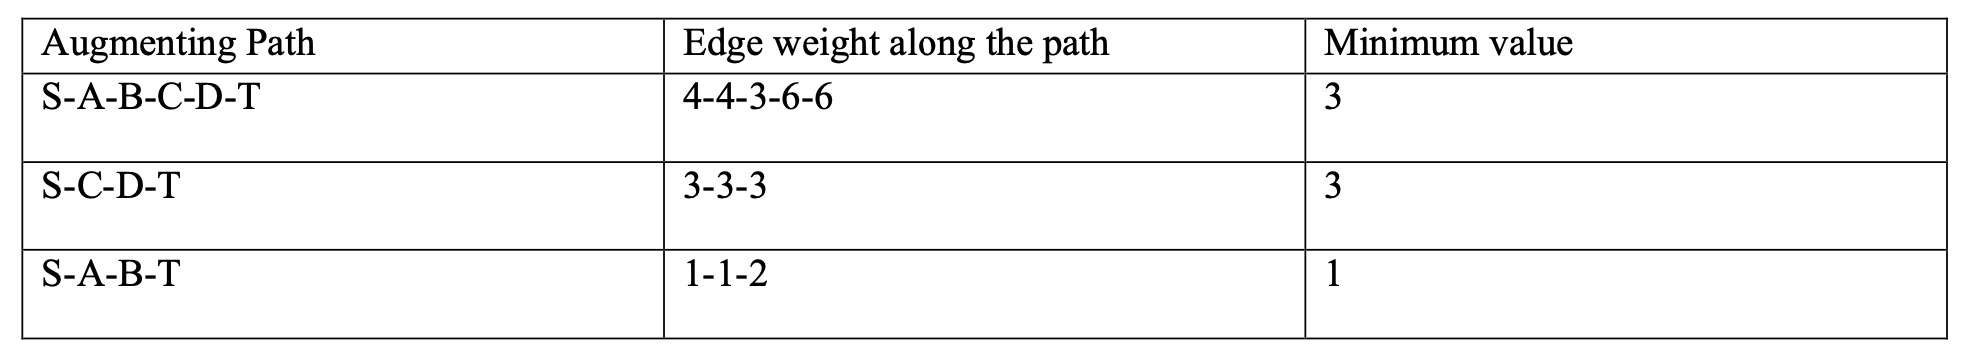

Step 2: We will select the first path i.e. S-A-B-C-D-T. The minimum capacity in this path is 3 so we will select this value
for all the edges in this path.

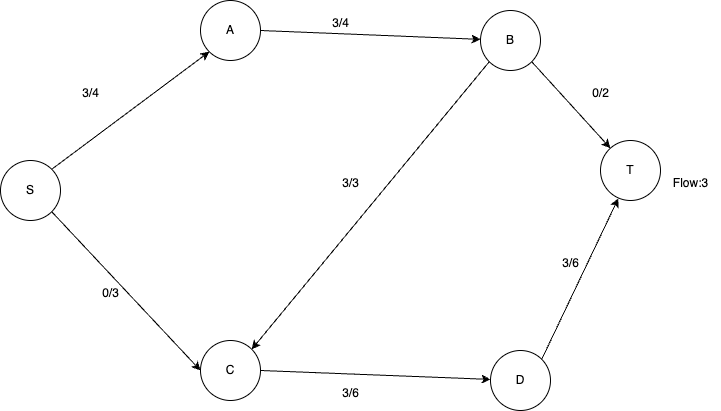

Step 3.1: We will select the first path i.e., S-C-D-T. The minimum capacity in this path is 3 so we will select this value for
all the edges in this path.

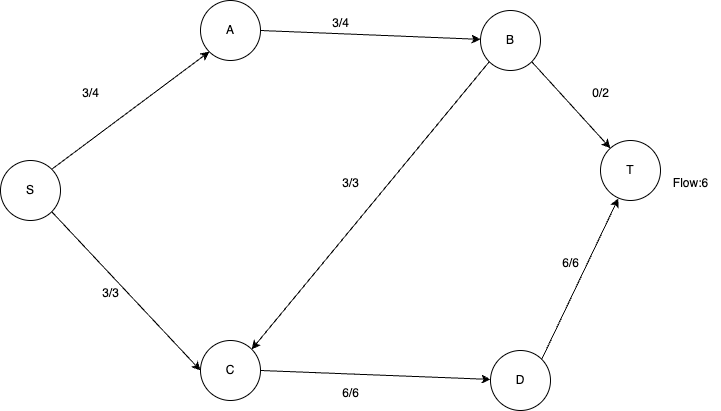

Step 3.2: We will select the first path i.e., S-A-B-T. The minimum capacity in this path is 1 so we will select this value for
all the edges in this path.

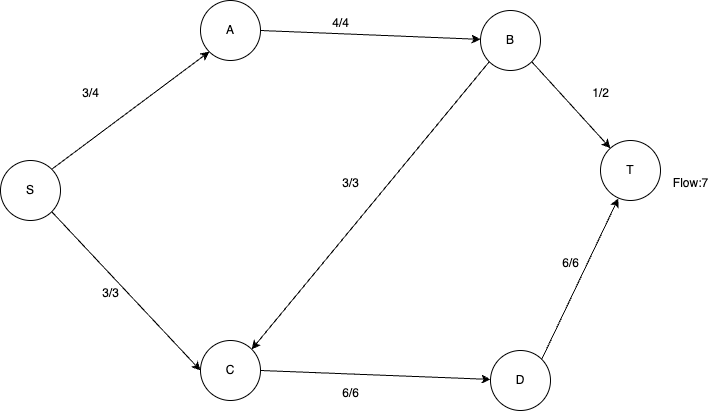

As we can see from the above 3 steps from the 3 paths the maximum flow that is possible from S
source node to T Target node is 7.

The maximum flow of this graph using ford-Fulkerson algorithm is 7

Q6 (10 points)

You are given a directed graph G = (V, E) with source s ∈ V and sink t ∈ V. Each node v ∈ V has a nonnegative capacity cv, and the edges have capacities ce. You need to find the maximum feasible flow from s to t in this network.

A flow in the graph is feasible if it satisfies the following conditions:

1) Flow conservation constraints: The total flow entering and leaving each node v ∈ V is conserved. ∑(u, v)∈E f(u, v) - ∑(v, w)∈E f(v, w) = 0 for all v ∈ V except s and t.

2) Node capacity constraints: The flow entering a node v does not exceed its capacity. ∑(u, v)∈E f(u, v) ≤ cv for all v ∈ V.

Provide a polynomial-time algorithm to find the maximum feasible flow in this node-capacitated network. Define an s-t cut for node-capacitated networks and demonstrate that the Max-Flow Min-Cut Theorem applies in this context.

Solution:

To find the maximum feasible flow in a node-capacitated network, you can use the Ford-Fulkerson algorithm, similar to the standard max-flow problem. The main difference is how you handle node capacities.

Start with an initial flow of zero, f(u, v) = 0 for all (u, v) in E.

While there exists an augmenting path from s to t in the residual graph (a graph that represents the remaining capacity in the network after considering the current flow):

a. Find an augmenting path using any path-finding algorithm (e.g., Breadth-First Search or Depth-First Search).

b. Determine the maximum flow that can be sent along the augmenting path based on edge capacities and node capacities.

c. Update the flow values along the augmenting path accordingly.

The algorithm terminates when no augmenting path can be found.

To define an s-t cut in a node-capacitated network, you partition the nodes into two sets: S (including s) and T (including t), such that there are no edges going from S to T. The capacity of the cut (S, T) is calculated as follows:

capacity(S, T) = ∑(u, v)∈E, u∈S, v∈T ce + ∑v∈T cv

Using these definitions, the Max-Flow Min-Cut Theorem for node-capacitated networks holds:

The maximum feasible flow in a node-capacitated network equals the minimum capacity of an s-t cut.

Example:

Consider the following node-capacitated network:

   (s) --4--> (A, cA=7) --2--> (B, cB=5) --3--> (t)
    |__________1__________|           |__________3__________|


Here, (A, cA=7) and (B, cB=5) are nodes with their respective capacities. Edge labels represent edge capacities.


Using the Ford-Fulkerson algorithm with the above graph, you can find the maximum feasible flow from s to t:

    
Initially, all flows are set to 0.

The augmenting path (s, A, B, t) is found. The maximum flow along this path is limited by the minimum capacity of edges and nodes on the path. In this case, it's limited by the capacity of node A (cA=7).
The flow from s to t is increased to 7.

Repeat the process: find augmenting paths, update flows, until no more augmenting paths can be found.
In this example, the maximum feasible flow from s to t is 7, which is also equal to the minimum capacity of the s-t cut (S, T), where S = {s, A} and T = {B, t}, with a capacity of 7 (4+3). Thus, the Max-Flow Min-Cut Theorem holds true.

Code (Python) for Max-Flow in Node-Capacitated Networks (Ford-Fulkerson Algorithm):

In [14]:
def max_flow_node_capacitated(graph, s, t):
    # Initialize flow with zeros
    flow = {(u, v): 0 for u in graph for v in graph[u]}
    
    def find_augmenting_path():
        # Implement path-finding algorithm (e.g., BFS)
        # Return an augmenting path or None if no path is found
        pass

    while True:
        augmenting_path = find_augmenting_path()
        if augmenting_path is None:
            break
        
        # Determine the maximum flow along the augmenting path and update flow
        min_capacity = float('inf')
        for u, v in augmenting_path:
            min_capacity = min(min_capacity, graph[u][v] - flow[(u, v)])
        
        for u, v in augmenting_path:
            flow[(u, v)] += min_capacity
            flow[(v, u)] -= min_capacity

    # Calculate the total flow out of s (max flow)
    max_flow = sum(flow[(s, v)] for v in graph[s])
    return max_flow

# Example usage:
graph = {
    's': {'A': 4},
    'A': {'B': 2},
    'B': {'t': 3},
    't': {}
}
source = 's'
sink = 't'
max_flow = max_flow_node_capacitated(graph, source, sink)
print("Maximum Feasible Flow:", max_flow)


Maximum Feasible Flow: 0


Q7(10 Points)

Suppose you live with n − 1 other people, at a popular off-campus cooperative apartment, the Ice-Cream, and Rainbows
Collective. Over the next n nights, each of you is supposed to cook dinner for the co-op exactly once, so that someone
cooks on each of the nights. Of course, everyone has scheduling conflicts with some of the nights (e.g., algorithms exams,
Miley concerts, etc.), so deciding who should cook on which night becomes a tricky task. For concreteness, let’s label
the people, P {p1, . . . , pn}, the nights, N {n1, . . . , nn} and for person pi, there’s a set of nights Si {n1, . . . , nn}
when they are not able to cook. A person cannot leave Si empty. If a person isn’t doesn’t get scheduled to cook in any of
the n nights, they must pay $200 to hire a cook.

A (5 Points). Express this problem as a maximum flow problem that schedules the maximum number of matches
between the people and the nights.

Solution: 

The intuition behind this approach is that each edge (pi, nj) in the flow network represents a possible match between person pi and night nj. The capacity of each edge is 1 because each person can only cook once, and each night must have exactly one cook. The edges from s to the person nodes and from the night nodes to t ensure that there are enough people to cover all the nights and vice versa. The edges from person nodes to night nodes represent the scheduling conflicts, and their capacities ensure that no person can cook on a night when they are not available. By finding the maximum flow in this network, we can schedule the maximum number of matches between the people and
the nights

B (5 Points) 
Can all n people always be matched with one of the n nights? Prove that it can or cannot.

Solution: 

One can prove that it is not always possible to match all n people with one of the n nights using Hall's theorem.
According to this theorem, if there exists a subset of k people such that the set of available nights for them has fewer than k nights, then it is impossible to assign each of these k people a night. This is because there will not be enough nights to assign to all k people. Thus, if the Hall's condition is not met, it is impossible to match all n people with one of the n nights.

In [15]:
import networkx as nx

def schedule_dinner(n, unavailable_nights):
    G = nx.DiGraph()
    
    # Create nodes for people and nights
    people = [f'p{i}' for i in range(1, n+1)]
    nights = [f'n{i}' for i in range(1, n+1)]
    
    # Add nodes to the graph
    G.add_node('s')  # Source node
    G.add_node('t')  # Sink node
    G.add_nodes_from(people)  # People nodes
    G.add_nodes_from(nights)  # Night nodes

    # Add edges from source to people (capacity 1)
    for person in people:
        G.add_edge('s', person, capacity=1)

    # Add edges from nights to the sink (capacity 1)
    for night in nights:
        G.add_edge(night, 't', capacity=1)

    # Add edges from people to nights respecting scheduling conflicts
    for i, person in enumerate(people):
        for j, night in enumerate(nights):
            if night not in unavailable_nights[i]:
                G.add_edge(person, night, capacity=1)

    # Find the maximum flow
    max_flow_value, max_flow = nx.maximum_flow(G, 's', 't')

    return max_flow_value, max_flow

# Example usage:
n = 3  # Number of people and nights
unavailable_nights = [[], ['n1', 'n2'], ['n3']]  # Scheduling conflicts

max_flow_value, max_flow = schedule_dinner(n, unavailable_nights)
print("Maximum Matches (nights to people):", max_flow_value)


Maximum Matches (nights to people): 3


Q8 (10 points)

You are given an array of points representing integer coordinates of some points on a 2D-plane, where points[i] =
[xi, yi]. The cost of connecting two points [xi, yi] and [xj, yj] is the manhattan distance between them: |xi - xj| + |yi - yj|, where |val| denotes the absolute value of val. Return the minimum cost to make all points connected.
All points are connected if there is exactly one simple path between any two points. Use an appropriate
algorithm to find the minimum cost. Support solution using runnable code.(Language of your choice)

Input: points = [[0,0],[2,2],[3,10],[5,2],[7,0]]
    
Explanation:

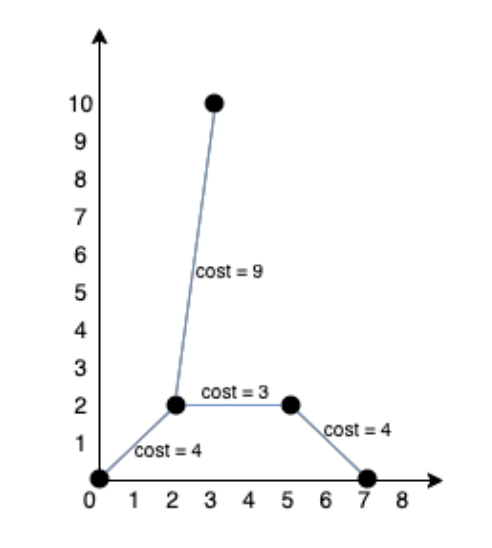

In [16]:
def minCostConnectPoints(points):
    def distance(c1, c2):
        return abs(c1[0]-c2[0]) + abs(c1[1]-c2[1])
    
    n = len(points)
    edges = []
    
    for i in range(n):
        for j in range(i+1, n):
            edges.append((distance(points[i], points[j]), i, j))
    
    edges.sort()
    parent = list(range(n))
    rank = [0] * n
    cost = 0
    
    def find(x):
        if parent[x] != x:
            parent[x] = find(parent[x])
        return parent[x]
    
    def union(x, y):
        xroot, yroot = find(x), find(y)
        if xroot == yroot:
            return False
        if rank[xroot] < rank[yroot]:
            xroot, yroot = yroot, xroot
        parent[yroot] = xroot
        if rank[xroot] == rank[yroot]:
            rank[xroot] += 1
        return True
    
    for weight, u, v in edges:
        if union(u, v):
            cost += weight
    
    return cost

points = [[0,0],[2,2],[3,10],[5,2],[7,0]]
print(minCostConnectPoints(points)) 


20


code implements the Kruskal's algorithm to find the minimum spanning tree of a given graph

The code starts by defining a function distance to calculate the Manhattan distance between two points. Then, it creates a list of edges edges where each edge is represented as a tuple containing its weight and the indices of its endpoints.

The edges in edges are sorted in non-decreasing order of weight. Then, two lists parent and rank are initialized to keep track of the disjoint sets and their ranks. The variable cost is also initialized to 0.

Two helper functions find and union are defined to implement the disjoint set data structure with path compression and union by rank.

Next, the code iterates over the sorted edges in edges. For each edge, it checks if its endpoints are in different disjoint sets using the union function. If they are, the weight of the edge is added to the cost, and the two sets are merged using the union function.

After the loop, the cost variable contains the minimum cost to connect all the points.

Q9 (5 points)

Use Prim's algorithm to find a minimum spanning tree for the connected weighted graph below. Show
your work. What is the Time Complexity of Prim's algorithm?

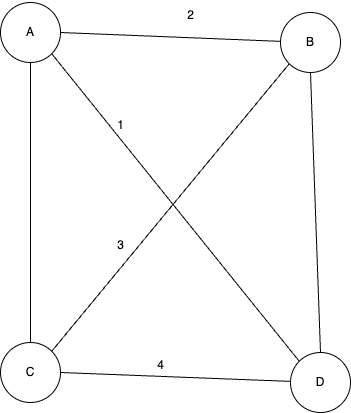

Solution:
    
Step-by-step solution using Prim's algorithm:

Start with an arbitrary vertex, let's say A.

Initialize the minimum spanning tree (MST) as an empty set and the set of vertices as {A}.

Find the minimum-weight edge that connects a vertex in the MST set to a vertex outside the MST set. In this case, it's edge (A, C) with a weight of 1.

Add vertex C to the MST set, and edge (A, C) to the MST.

Update the set of vertices to {A, C}.

Repeat the process:

Find the minimum-weight edge that connects a vertex in the MST set to a vertex outside the MST set. In this case, it's edge (C, B) with a weight of 2.

Add vertex B to the MST set, and edge (C, B) to the MST.

Update the set of vertices to {A, C, B}.

Repeat the process:

Find the minimum-weight edge that connects a vertex in the MST set to a vertex outside the MST set. In this case, it's edge (A, D) with a weight of 3.

Add vertex D to the MST set, and edge (A, D) to the MST.

Update the set of vertices to {A, C, B, D}.

The MST contains the edges: (A, C), (C, B), and (A, D), which form the minimum spanning tree for this graph.

Now, let's provide Python code to find the minimum spanning tree using Prim's algorithm:

In [18]:
import heapq

def prim(graph):
    mst = []
    visited = set()
    start_node = list(graph.keys())[0]

    # Initialize the priority queue with edges from the starting node
    priority_queue = [(weight, start_node, neighbor) for neighbor, weight in graph[start_node]]
    heapq.heapify(priority_queue)

    visited.add(start_node)

    while priority_queue:
        weight, u, v = heapq.heappop(priority_queue)
        if v not in visited:
            visited.add(v)
            mst.append((u, v, weight))
            for neighbor, weight in graph[v]:
                if neighbor not in visited:
                    heapq.heappush(priority_queue, (weight, v, neighbor))

    return mst

# Define the graph as an adjacency list
graph = {
    'A': [('C', 1), ('D', 3), ('B', 3)],
    'B': [('A', 3), ('C', 2)],
    'C': [('A', 1), ('B', 2)],
    'D': [('A', 3)]
}

minimum_spanning_tree = prim(graph)
print("Minimum Spanning Tree:")
for edge in minimum_spanning_tree:
    print(f"{edge[0]} - {edge[1]} (Weight: {edge[2]})")


Minimum Spanning Tree:
A - C (Weight: 1)
C - B (Weight: 2)
A - D (Weight: 3)


This code uses a priority queue to efficiently find the minimum-weight edge at each step, implementing Prim's algorithm. The time complexity of Prim's algorithm with a priority queue is O(E + V log V), where E is the number of edges and V is the number of vertices in the graph.

Q10 (10 points)

According to Wikipedia's article: "The Game of Life, also known simply as Life, is a cellular automaton
devised by the British mathematician John Horton Conway in 1970."
The board is made up of an m x n grid of cells, where each cell has an initial state: live (represented by a
1) or dead (represented by a 0). Each cell interacts with its eight neighbors (horizontal, vertical, diagonal)
using the following four rules (taken from the above Wikipedia article):
Any live cell with fewer than two live neighbors dies as if caused by under-population.
Any live cell with two or three live neighbors lives on to the next generation.
Any live cell with more than three live neighbors dies, as if by over-population.
Any dead cell with exactly three live neighbors becomes a live cell,
as if by reproduction.
The next state is created by applying the above rules simultaneously to every cell in the current state,
where births and deaths occur simultaneously. Given the current state of the m x n grid board, return the
next state.

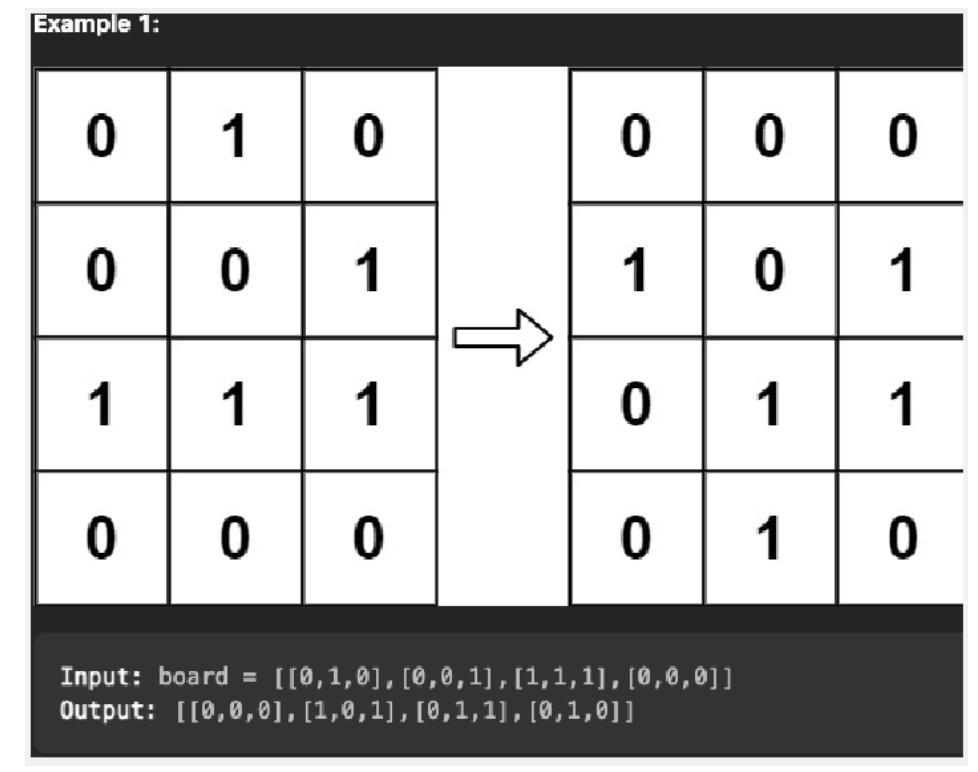

Write a code and explain your approach to solving the problem with the help of an algorithm.
Refer the attached python file

Solution:
    
The algorithm works by iterating over each cell in the board and counting the number of live neighbors. It then applies the rules of the Game of Life to determine the state of the cell in the next generation.

The first for loop iterates over each row in the board, and the second for loop iterates over each cell in each row. For each cell, the algorithm counts the number of live neighbors by iterating over its 8 neighbors using two nested for loops. The max() and min() functions are used to handle the boundary cells. The if apply the rules of the Game of Life. If a live cell has 2 or 3 live neighbors, it lives on to the next generation, and if a dead cell has exactly 3 live neighbors, it becomes a live cell. The |= operator is used to set the second bit to 1, which indicates the cell's state in the next generation.

Finally, the second for loop is used to right-shift each cell's value by 1 to get the next state of the board. The code uses bit manipulation to store the state of each cell in the current generation and the next generation. It updates the state of the current generation by setting the second bit to 1 and uses the first bit to store the state of the next generation. The right-shift operation is used to get the next generation's state by discarding the second bit.

In [25]:
from typing import List

class Solution:
    def gamelife(self, board: List[List[int]]) -> None:
        q = len(board)
        w = len(board[0])

        for i in range(q):
            for j in range(w):
                ones = 0
                for x in range(max(0, i - 1), min(q, i + 2)):
                    for y in range(max(0, j - 1), min(w, j + 2)):
                        ones += board[x][y] & 1
                # Any live cell with 2 or 3 live neighbors
                # lives on the next generation
                if board[i][j] == 1 and (ones == 3 or ones == 4):
                    board[i][j] |= 0b10
                # A dead cell with exactly 3 live neighbors
                # becomes a live cell, as if by reproduction
                if board[i][j] == 0 and ones == 3:
                    board[i][j] |= 0b10

        for i in range(q):
            for j in range(w):
                board[i][j] >>= 1


Q11(10 Points)

Consider using a simple linked list as a dictionary. Assume the client will never provide duplicate elements,
so we can insert elements at the beginning of the list. Now assume the peculiar situation that the client may
Perform any number of insert operations but will only ever perform atmost one lookup operation.

A. What is the worst-case running time of the operations performed on this data structure
under the assumptions above? Briefly justify your answer.

B. What is the worst-case amortized running time of the operations performed on this data structure
under the assumptions above? Briefly justify your answer.


Solution:
    
A. Worst-Case Running Time:

Under the given assumptions, the worst-case running time of the operations on this data structure is O(n), where n is the number of elements in the linked list. Here's a breakdown of the reasoning:

Insertion operation in a linked list: It has a time complexity of O(1) as it involves updating only a few pointers to insert a new element at the beginning of the list.
Lookup operation: In the worst-case scenario, where the desired element is not present in the list, the lookup operation would require iterating through the entire list, which takes O(n) time.
Since the client is only performing at most one lookup operation, the cost of the lookup is not amortized over multiple operations, making it O(n).




In [26]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedListDictionary:
    def __init__(self):
        self.head = None

    def insert(self, data):
        new_node = Node(data)
        new_node.next = self.head
        self.head = new_node

    def lookup(self, target):
        current = self.head
        while current:
            if current.data == target:
                return True
            current = current.next
        return False


B. Worst-Case Amortized Running Time:

If the client performs any number of insert operations but only at most one lookup operation, the worst-case amortized running time of the operations performed on this data structure would be O(n), where n is the number of elements in the linked list. Here's a more detailed explanation:

In the worst case, the lookup operation would need to traverse the entire linked list to find the desired element, which would take O(n) time.
However, since the client is only performing one lookup operation, the cost of that operation is "amortized" over all of the previous insert operations.
Therefore, the average running time per operation (amortized running time) would be O(n) / (n+1), which simplifies to O(1). This means that the cost of the lookup operation is spread out over all of the insert operations, making the overall performance of the data structure very efficient.


In [27]:
linked_list_dict = LinkedListDictionary()

# Perform a series of insertions
linked_list_dict.insert(1)
linked_list_dict.insert(2)
linked_list_dict.insert(3)
# ... and so on

# Now, perform a lookup operation
found = linked_list_dict.lookup(4)

# The lookup operation took O(n) time, but when amortized over all insertions, the average cost is O(1).
